In [1]:
# importing notebook dependencies 
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 150

# main libraries
import pandas as pd
import numpy as np

# importing vega datasets
from vega_datasets import data

# visualization libraries/modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid", font_scale = 0.75)

from datetime import datetime
import requests

from tqdm.notebook import tqdm, trange
import time # to be used in loop iterations

In [2]:
# inspecting the vega datasets -- extracting "sf_temps()" data

temps = data.sf_temps()
print()
print(f'shape: {temps.shape}')
temps.head()


shape: (8759, 2)


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


----
### **``SF Temperature Dataset Exercises``**
* For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.
* For this exercise you'll need to install a library that will provide us access to some more datasets:
* Write the code necessary to visualize the minimum temperature over time.
* Write the code necessary to visualize the maximum temperature over time.
* Which month is the coldest, on average?
* Which month has the highest average temperature?
* Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
* Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.
* from vega_datasets import data
* data.seattle_weather()

In [3]:
# info check

temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# date column appears to be in accurate datetime format
# moving this column to the index col

temps = temps.set_index("date").sort_index()
temps.head() # checks out!

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [5]:
# Exercise 1: Resample by the day and take the average temperature. 
# Visualize the average temperature over time.

daily_mean = temps.resample('D').mean()
daily_mean

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


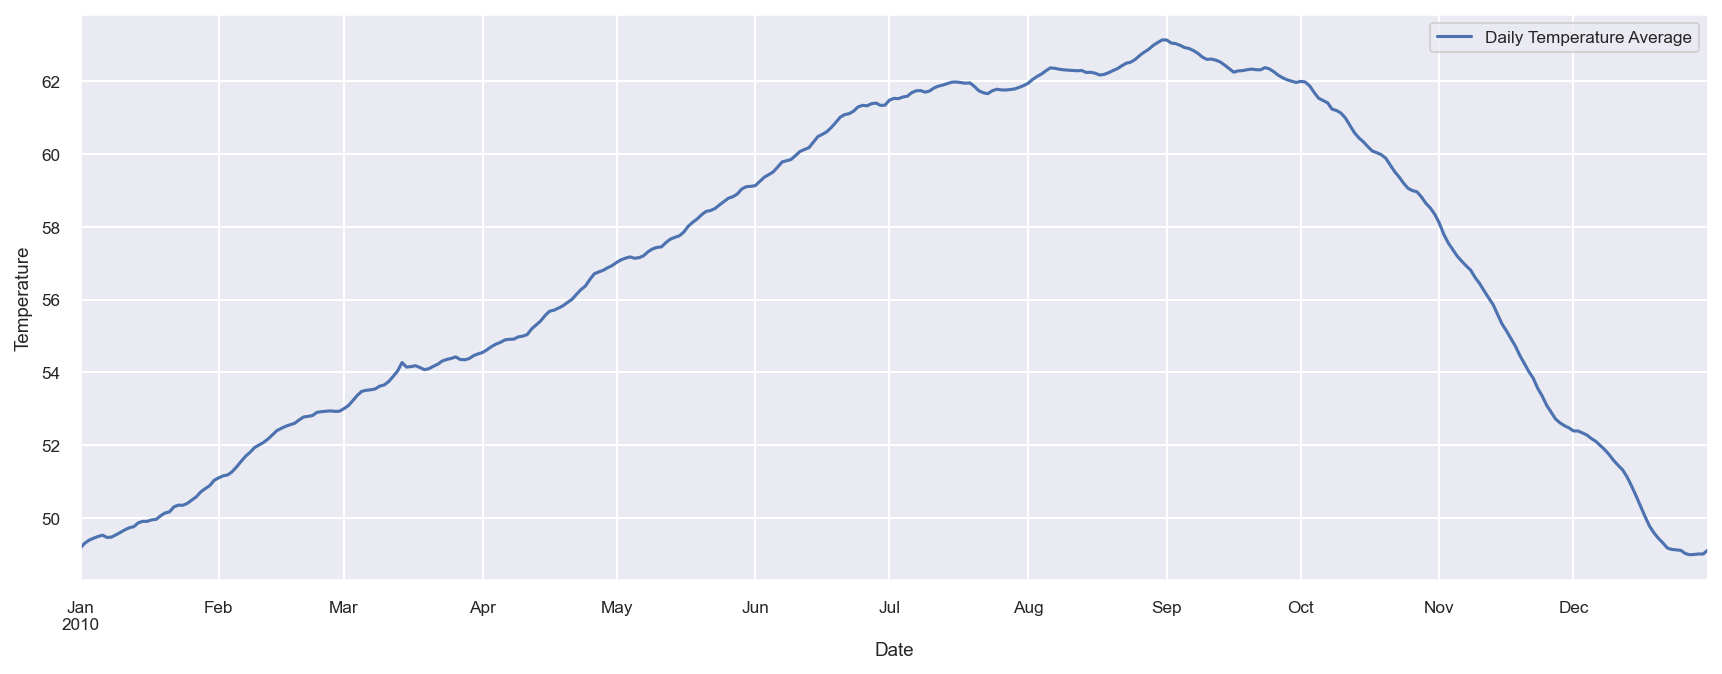

In [6]:
# visualizing the daily temperature average

plt.figure(figsize = (14, 5))
daily_mean.temp.plot(label = "Daily Temperature Average")

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [7]:
# Write the code necessary to visualize the minimum temperature over time

min_temp = temps.resample('D').min()
min_temp

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


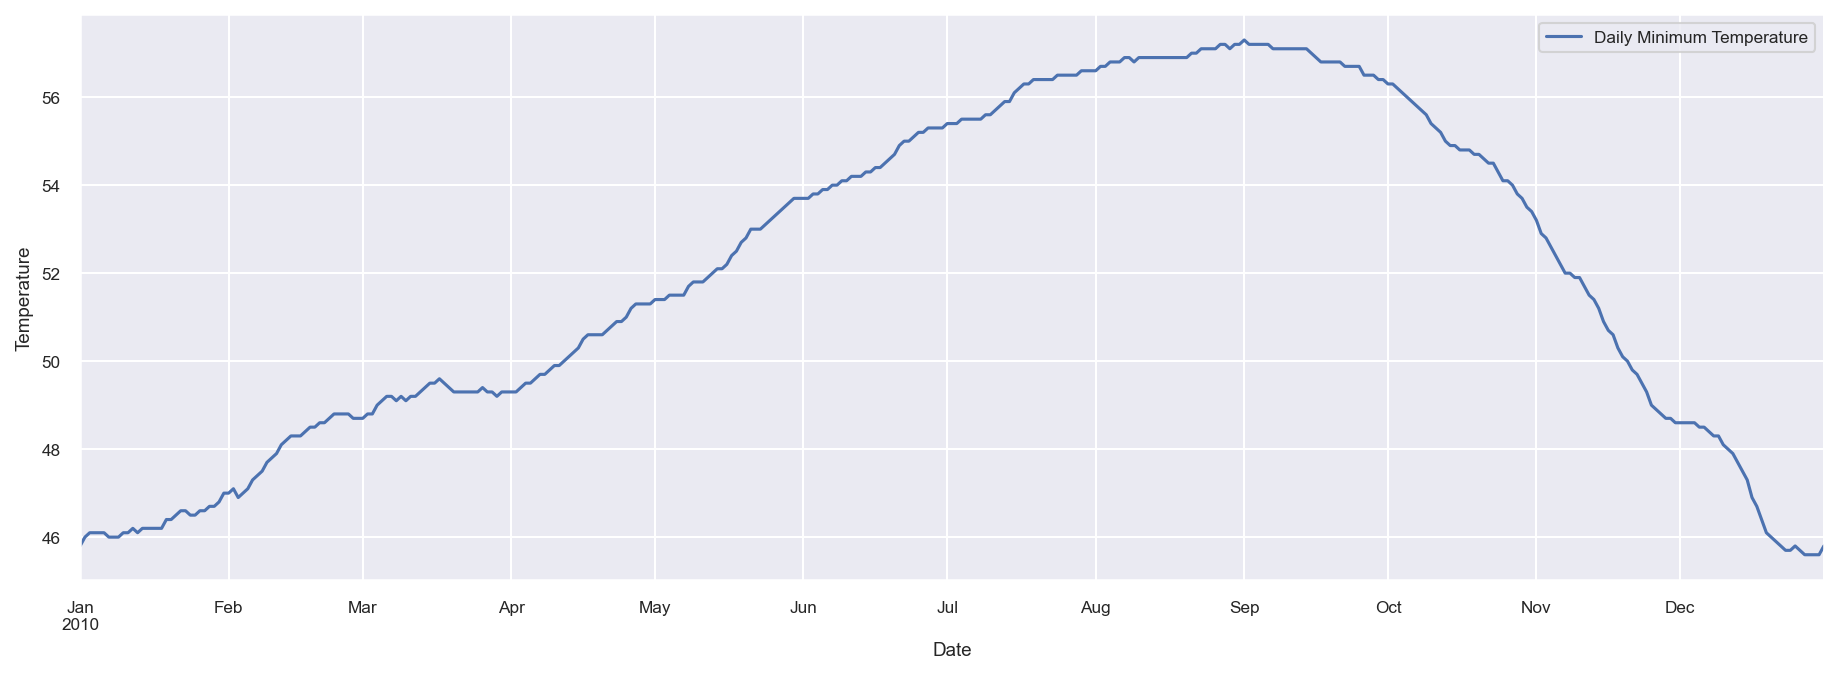

In [8]:
# let's visualize minimum temp over time

plt.figure(figsize = (15, 5))

ax = min_temp.temp.plot(label = "Daily Minimum Temperature")

plt.xlabel("Date")
plt.ylabel("Temperature")
# plt.ylabel("Temperature", rotation =0)
plt.legend()
plt.show()

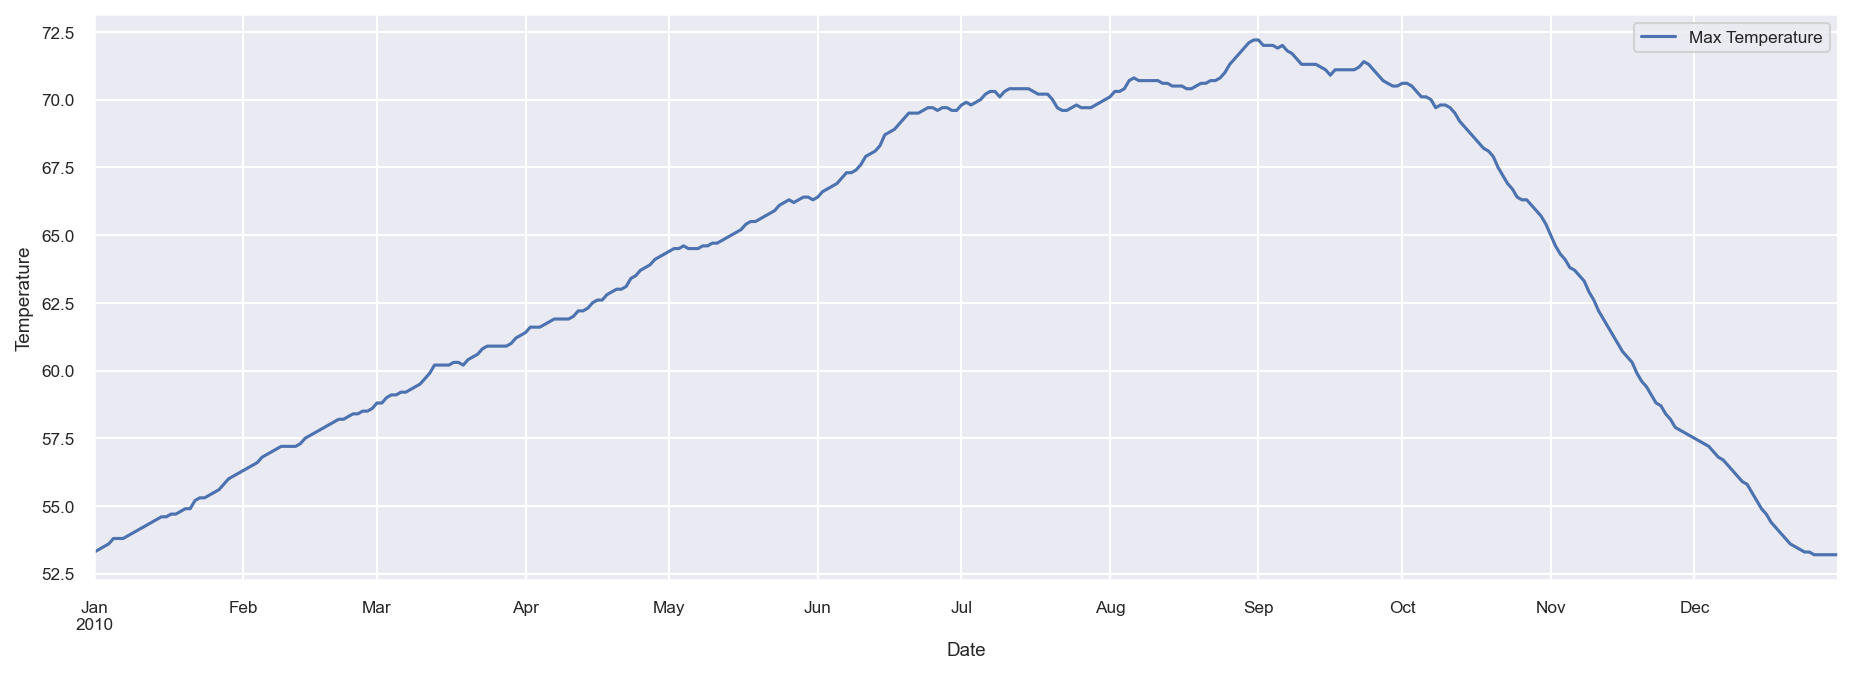

In [9]:
# Write the code necessary to visualize the maximum temperature over time

plt.figure(figsize = (15, 5))

max_temp = temps.resample('D').max()
max_temp.temp.plot(label = "Max Temperature")

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Which month is the coldest, on average?

month_avg_temps = temps.resample('M').mean()
month_avg_temps.head()

In [11]:
# returning the coldest month (January/coldest)

coldest_month = month_avg_temps.loc[month_avg_temps["temp"].idxmin()]
coldest_month # where on average, January is the coldest month in the dataset

temp    49.98414
Name: 2010-01-31 00:00:00, dtype: float64

In [12]:
# Which month has the highest average temperature? (September/warmest)

warmest_month = month_avg_temps.loc[month_avg_temps["temp"].idxmax()]
warmest_month # where on average, September is the coldest month in the dataset

temp    62.487083
Name: 2010-09-30 00:00:00, dtype: float64

----
**``Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max']))``**
* Use this resampled dataframe to calculate the change in temperature for the day
* Which month has the highest daily temperature variability?

In [13]:
# returning min and max temperatures on ea. day in the dataset

min_and_max_temps = temps.resample('D')
min_and_max_temps = min_and_max_temps.temp.agg(["min", "max"])
min_and_max_temps

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [14]:
# Use this resampled dataframe to calculate the change in temperature for the day

min_and_max_temps['range'] = min_and_max_temps['max'] - min_and_max_temps['min']
min_and_max_temps

,min,max,range
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [15]:
# calculating highest variability = range per month

highest_monthly_variability = min_and_max_temps.resample('M').mean().round(2)
highest_monthly_variability 

,min,max,range
date,,,
2010-01-31,46.31,54.65,8.34
2010-02-28,48.06,57.55,9.49
2010-03-31,49.24,60.09,10.85
2010-04-30,50.33,62.65,12.32
2010-05-31,52.40,65.31,12.91
2010-06-30,54.48,68.43,13.95
2010-07-31,56.05,70.02,13.98
2010-08-31,56.94,70.81,13.87
2010-09-30,56.90,71.31,14.40


In [16]:
# highest monthly temp. variability = September

highest_monthly_variability.loc[highest_monthly_variability['range'].idxmax()]

min      56.90
max      71.31
range    14.40
Name: 2010-09-30 00:00:00, dtype: float64

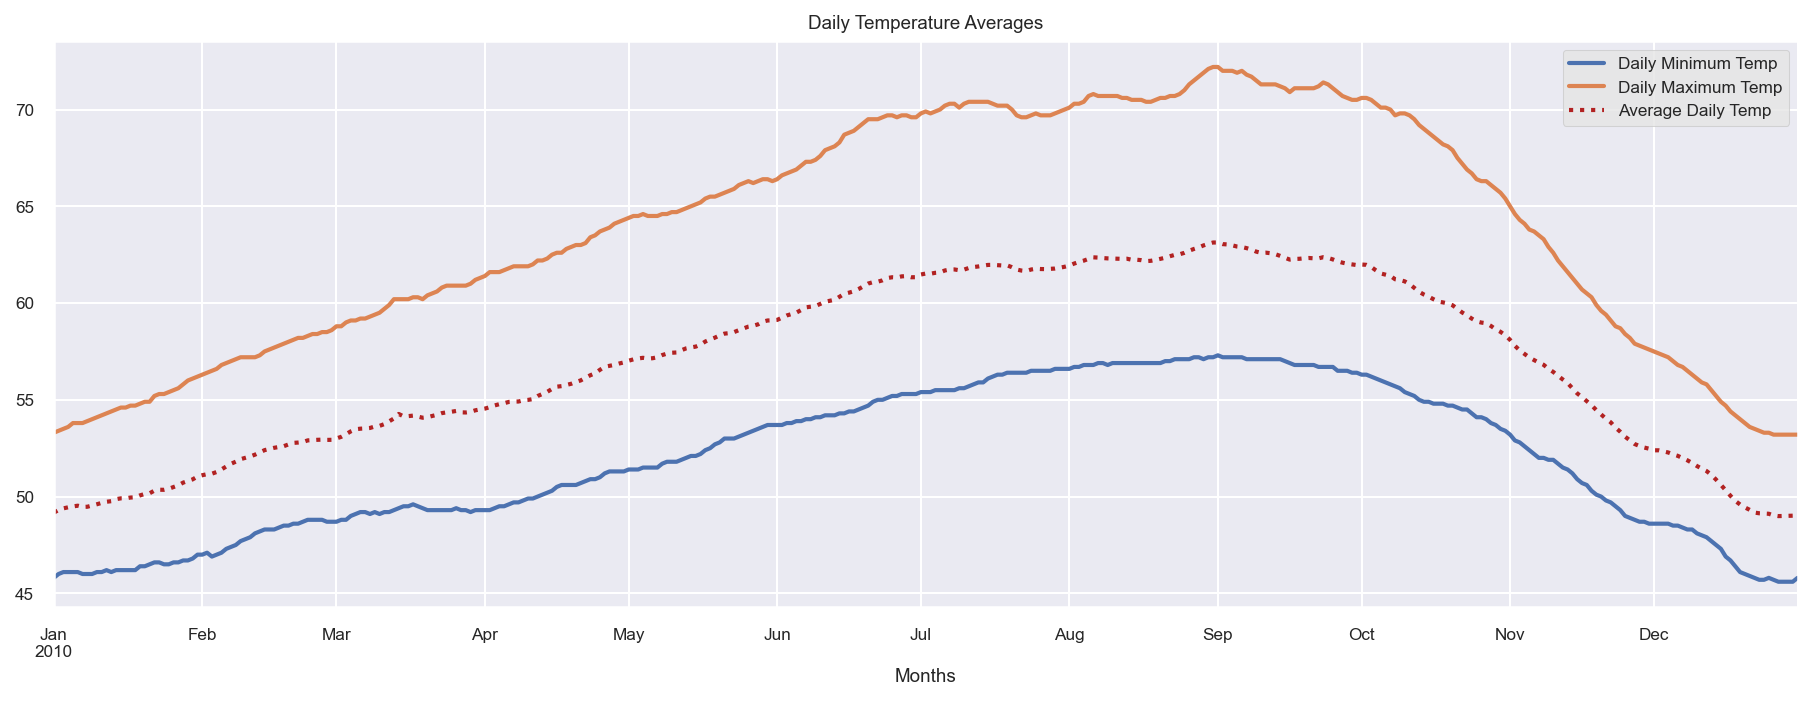

In [17]:
plt.figure(figsize = (15, 5))


min_temp['temp'].plot(label = "Daily Minimum Temp", linewidth = 2)
max_temp['temp'].plot(label = "Daily Maximum Temp", linewidth = 2)
daily_mean['temp'].plot(label = "Average Daily Temp", linewidth = 2, color = 'firebrick', linestyle = ":")


plt.title("Daily Temperature Averages")
plt.xlabel("Months")
plt.style.use('ggplot')
plt.legend()
plt.show()

----
### **``Seattle Weather Dataset Exercises``**

**Use the dataset to answer the following questions:**

* Which year and month combination has the highest amount of precipitation?
* Visualize the amount of monthly precipitation over time.
* Visualize the amount of wind over time. Choose a time interval you think is appropriate.
* Which year-month combination is the windiest?
* What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
* In which month does it rain the most?
* Which month has the most number of days with a non-zero amount of precipitation?

In [18]:
# importing the seattle weather data

seattle = data.seattle_weather()
print()
print(f'shape: {seattle.shape}')
seattle


shape: (1461, 6)


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [19]:
# checking the df information

seattle.info() # correct 'datetime type' for dates in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [20]:
# let's set the date column as the index
# also removing the date header in index position

seattle = seattle.set_index("date")
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [21]:
# Which year and month combination has the highest amount of precipitation?

by_month_sum = seattle.resample("M").sum()
by_month_sum.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,173.3,218.7,47.8,120.9
2012-02-29,92.3,269.0,92.9,113.2
2012-03-31,183.0,296.2,88.0,131.7
2012-04-30,68.1,446.2,179.8,101.2
2012-05-31,52.2,547.5,253.9,104.0


In [22]:
# December 2015 = month and year with highest precipation 

highest_precipation = by_month_sum.loc[by_month_sum.precipitation.idxmax()]
highest_precipation

precipitation    284.5
temp_max         259.8
temp_min         118.6
wind             134.6
Name: 2015-12-31 00:00:00, dtype: float64

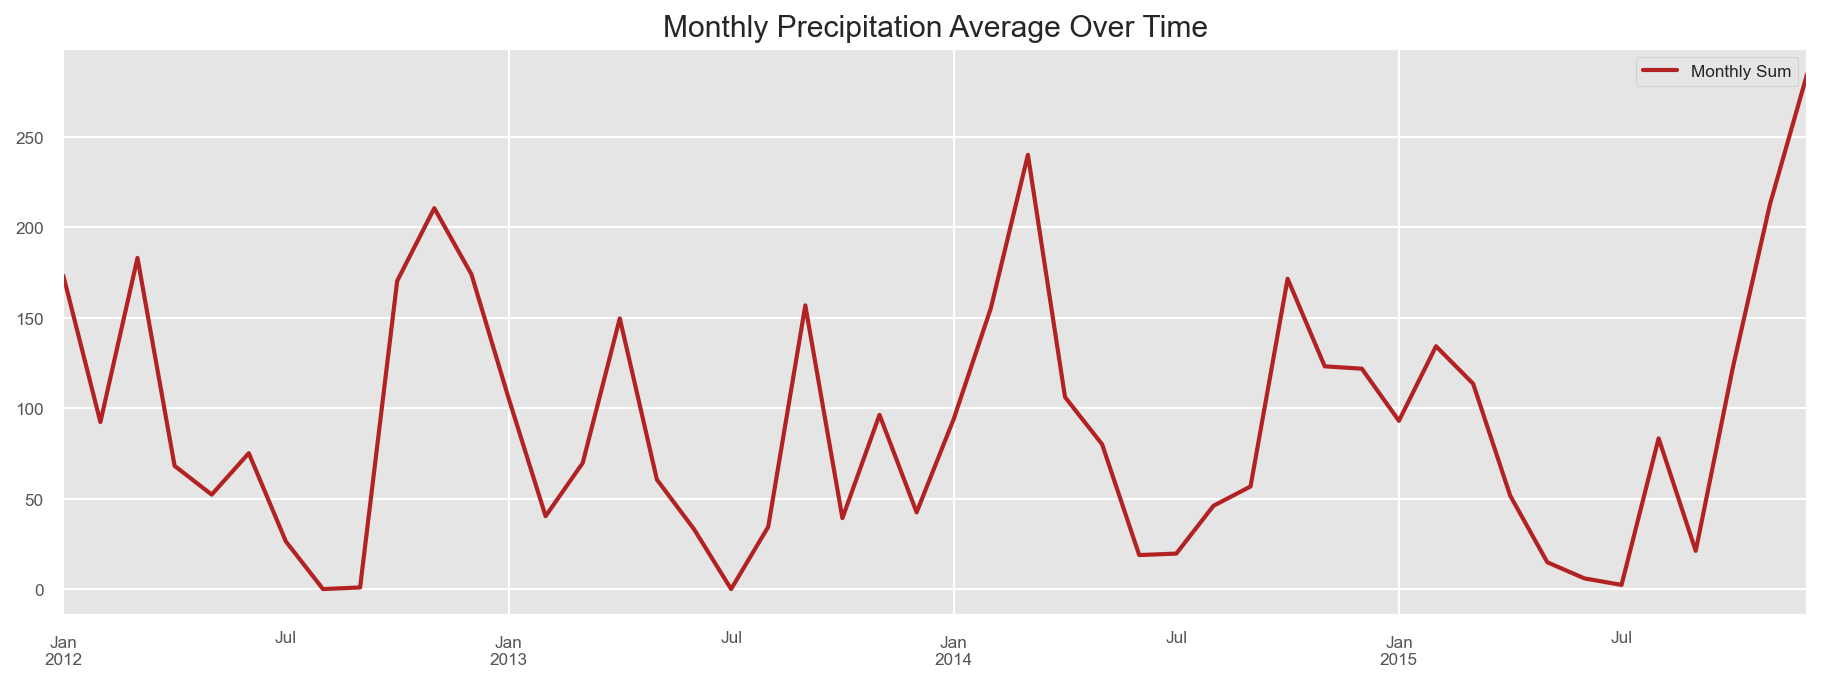

In [23]:
# Visualize the amount of monthly precipitation over time

plt.figure(figsize=(15, 5))

by_month_sum.precipitation.plot(
    label = "Monthly Sum",
    linewidth = 2, 
    color = 'firebrick')


plt.title("Monthly Precipitation Average Over Time")
plt.xlabel(None)
plt.style.use('ggplot')
plt.legend()
plt.show()

In [24]:
# Visualize the amount of wind over time. With an appropriate time interval 
# let's first calculate the date range in the df
# 2012/JAN - 2015/DEC

date_range = str(seattle.index.min()) + ' to ' +str(seattle.index.max())
date_range


'2012-01-01 00:00:00 to 2015-12-31 00:00:00'

In [25]:
# let's calculate average of seattle weather for calculating windiest month/year

by_month_avg = seattle.resample("M").mean()
by_month_avg.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,5.590323,7.054839,1.541935,3.900000
2012-02-29,3.182759,9.275862,3.203448,3.903448
2012-03-31,5.903226,9.554839,2.838710,4.248387
2012-04-30,2.270000,14.873333,5.993333,3.373333
2012-05-31,1.683871,17.661290,8.190323,3.354839


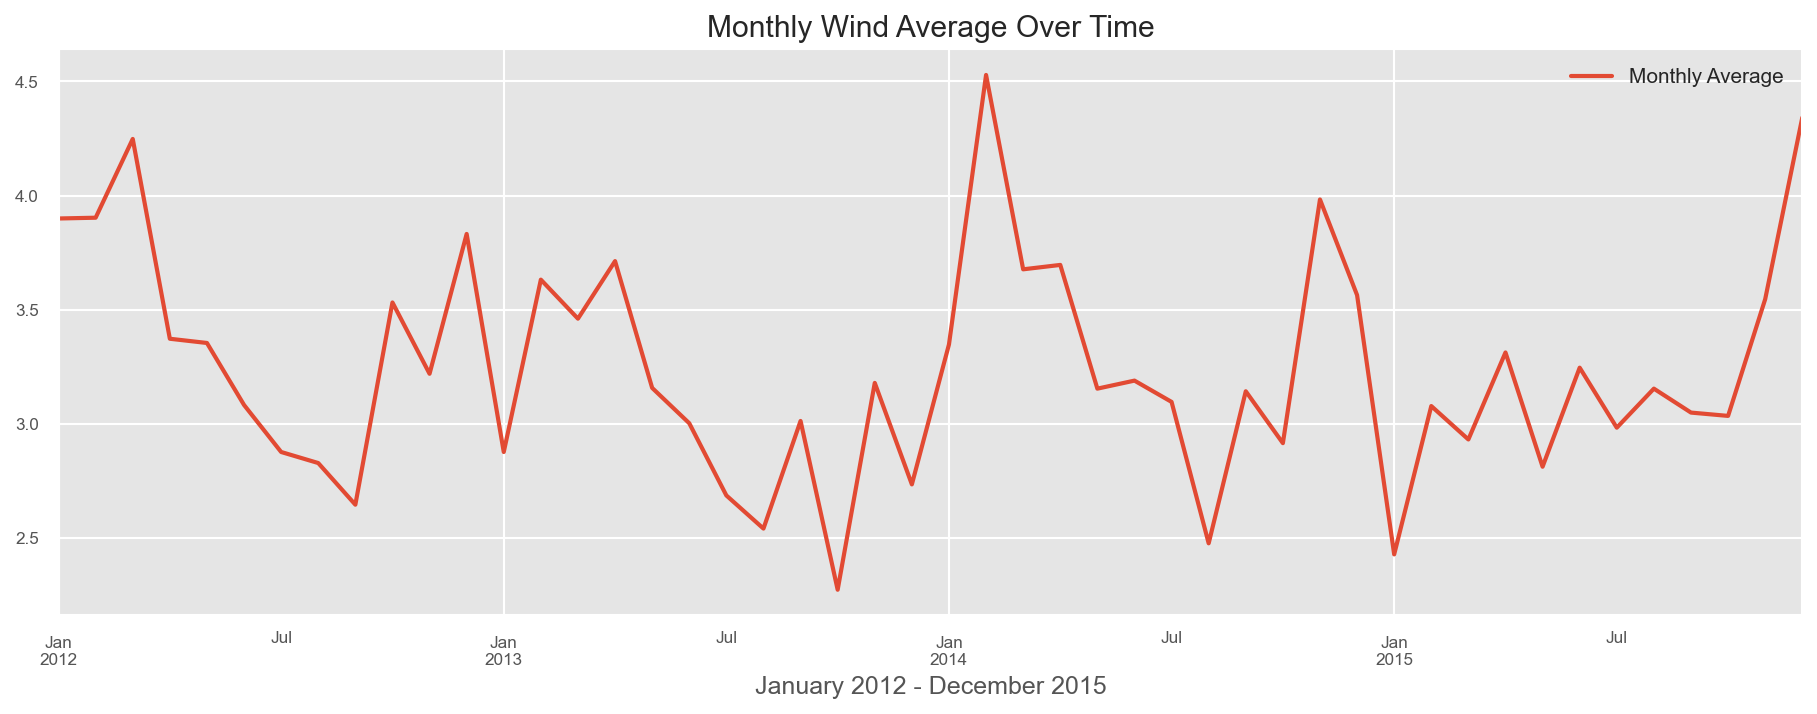

In [26]:
# let's visualize by month wind

plt.figure(figsize=(15, 5))

by_month_avg.wind.plot(
    label = "Monthly Average",
    linewidth = 2)


plt.title("Monthly Wind Average Over Time")
plt.xlabel(None)
plt.xlabel("January 2012 - December 2015")
plt.style.use('seaborn')
plt.legend()
plt.show()

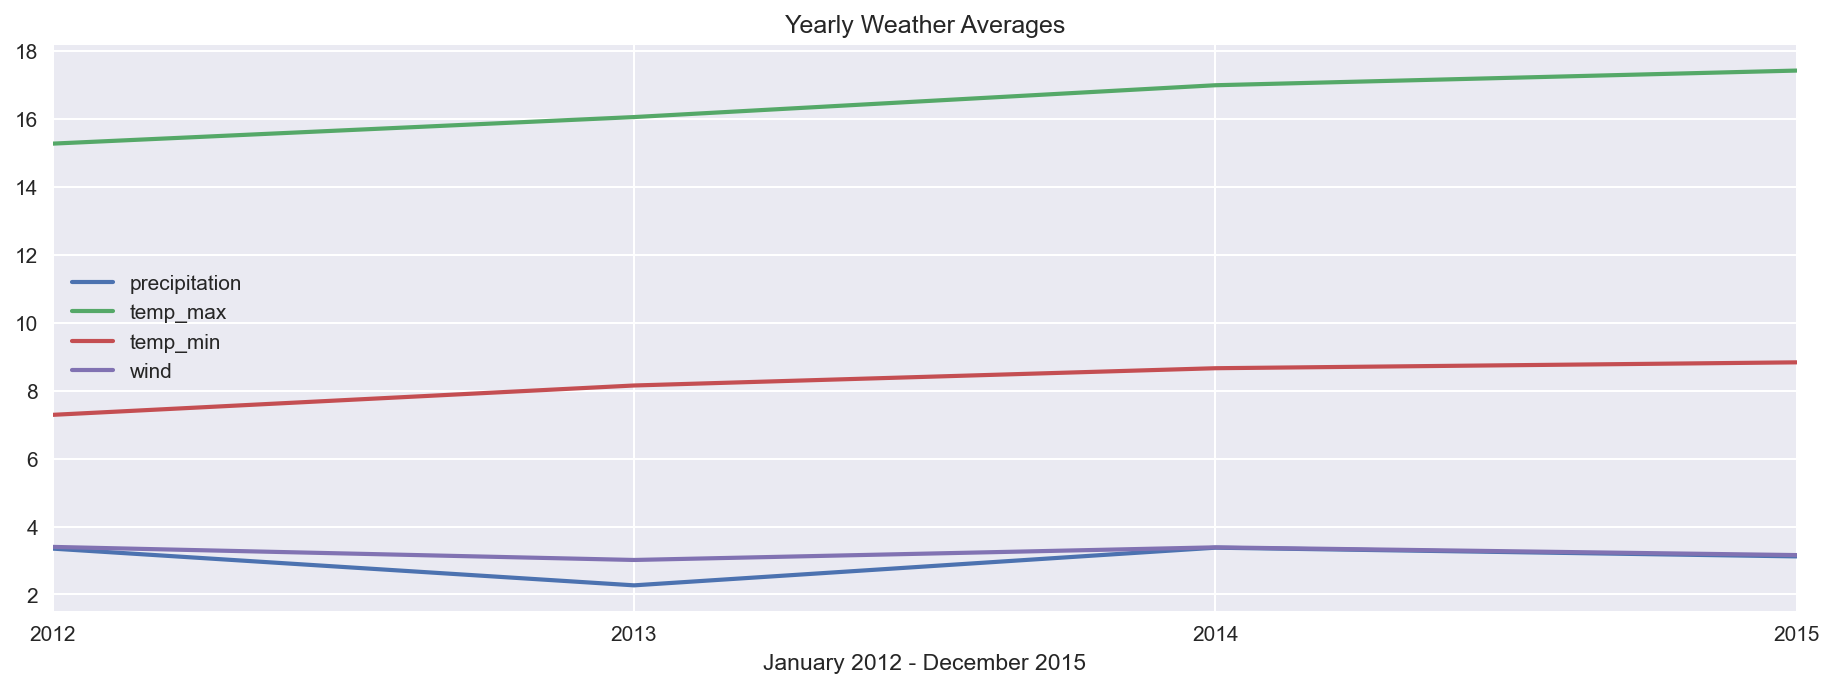

In [27]:
# what about over year?

seattle.resample("Y").mean().plot(linewidth = 2, figsize=(15, 5))

plt.title("Yearly Weather Averages")
plt.xlabel(None)
plt.xlabel("January 2012 - December 2015")
plt.style.use('seaborn')
plt.show()

In [28]:
# Which year-month combination is the windiest?
# November 2014 

windiest_month_and_year = by_month_avg.loc[by_month_avg.wind.idxmax()]
windiest_month_and_year 

precipitation    5.542857
temp_max         8.200000
temp_min         2.635714
wind             4.528571
Name: 2014-02-28 00:00:00, dtype: float64

In [29]:
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

just_sun = seattle[seattle["weather"] == "sun"]
just_sun

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun
...,...,...,...,...,...
2015-12-13,1.3,7.8,6.1,6.1,sun
2015-12-14,0.0,7.8,1.7,1.7,sun
2015-12-26,0.0,4.4,0.0,2.5,sun


In [30]:
# looking at just the dates in 'just_sun' df

sunny_dates = just_sun.index.value_counts()
sunny_dates

2012-01-08    1
2014-09-13    1
2014-08-19    1
2014-08-20    1
2014-08-21    1
             ..
2013-08-22    1
2013-08-23    1
2013-08-24    1
2013-08-25    1
2015-12-31    1
Name: date, Length: 714, dtype: int64

In [31]:
# (December 2014) now let's look at the total count of sunny days by the year

sunniest_years = pd.DataFrame(sunny_dates.resample("Y").count()).rename(columns = {"date": "sunny_day_count"})
sunniest_years

,sunny_day_count
2012-12-31,118
2013-12-31,205
2014-12-31,211
2015-12-31,180


In [32]:
# In which month does it rain the most?

seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [33]:
# looking at just monthly seattle weather averages 

rainny_days = seattle[seattle["weather"] == "rain"]
rainny_days.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain


In [34]:
# highest monthly precipitation 

rainny_sum = rainny_days.resample("M").sum()
rainny_sum.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,104.8,155.4,60.0,76.5
2012-02-29,86.6,155.1,77.8,65.1
2012-03-31,120.5,171.7,63.9,80.3
2012-04-30,63.5,263.9,126.0,68.4
2012-05-31,52.2,246.1,136.8,57.2


In [35]:
# now let's get the highest precipitation month

rainniest_month_on_avg = rainny_sum.resample("M").mean()
rainniest_month_on_avg.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,104.8,155.4,60.0,76.5
2012-02-29,86.6,155.1,77.8,65.1
2012-03-31,120.5,171.7,63.9,80.3
2012-04-30,63.5,263.9,126.0,68.4
2012-05-31,52.2,246.1,136.8,57.2


In [36]:
# rainniest month/year on average (November 2012 @210.5 inches per month)

rainniest_month_on_avg.loc[rainniest_month_on_avg.precipitation.idxmax()]

precipitation    210.5
temp_max         294.9
temp_min         150.1
wind              83.1
Name: 2012-11-30 00:00:00, dtype: float64

In [37]:
# Which month has the most number of days with a non-zero amount of precipitation?

----
### **``Flight Dataset Exercises``**

* Convert any negative delays to 0
* Which hour of the day has the highest average delay?
* Does the day of the week make a difference in the delay amount?
* Does the month make a difference in the delay amount?

In [38]:
# importing dataset

flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [39]:
# Convert any negative delays to 0

flights['delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])
flights.head() # checks out!

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


In [40]:
# Which hour of the day has the highest average delay?
# resample by hour? possibly consider a 'step'

flights = flights.set_index("date")
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [41]:
# let's use strftime method to extract the hour and set as new column

by_hr_avg = flights.resample("H").mean()
by_hr_avg.head()

,delay,distance
date,,
2001-01-01 00:00:00,14.0,405.0
2001-01-01 01:00:00,NaN,NaN
2001-01-01 02:00:00,NaN,NaN
2001-01-01 03:00:00,NaN,NaN
2001-01-01 04:00:00,NaN,NaN


In [42]:
# now let's get the hour with the highest average delay
# 0300 = 3AM

by_hr_avg.loc[by_hr_avg["delay"].idxmax()]

delay       360.0
distance    239.0
Name: 2001-02-23 03:00:00, dtype: float64

In [43]:
# Does the day of the week make a difference in the delay amount?

by_day_avg = flights.resample("D").mean()
by_day_avg

,delay,distance
date,,
2001-01-01,8.747126,567.729885
2001-01-02,21.808411,491.509346
2001-01-03,17.150000,488.987500
2001-01-04,7.176724,496.603448
2001-01-05,9.294118,484.546218
...,...,...
2001-03-27,4.669683,515.868778
2001-03-28,3.551282,496.914530
2001-03-29,13.545455,545.268182


In [44]:
# now let's get the day with the highest average delay
# January 12th 2001 = day with highest average delays
# The highest day delay avg. < the highest hour delay avg.

by_day_avg.loc[by_day_avg["delay"].idxmax()]

delay        37.106977
distance    465.748837
Name: 2001-01-12 00:00:00, dtype: float64

In [45]:
# Does the month make a difference in the delay amount?
# February 2001 = month with highest monthly delay average
# The highest monthly delay avg. < the highest daily delay avg.

by_month_avg = flights.resample("M").mean()
by_month_avg.loc[by_month_avg["delay"].idxmax()]

delay        12.306106
distance    511.156170
Name: 2001-02-28 00:00:00, dtype: float64